# K-Means를 numpy로 구현하기
- Numpy로 속도를 더 빠르게 할 수 있다.

In [1]:
import numpy as np

K = 3 # cluster 개수
N = 100 # data 개수
V = 2 # 색인어(Index/Unique/Distinct terms)

np.random.seed(0)
X = np.random.randint(99, size=(N, V)) +1 # dataset
C = np.random.randint(99, size=(K, V)) +1 # initial centroid

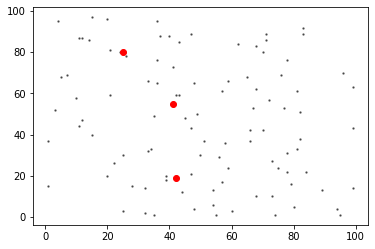

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:,0], X[:,1], c="k", s=2, alpha=0.5)
plt.scatter(C[:,0], C[:,1], c="r")
plt.show()

# K-means with Euclide distance

In [3]:
for _ in range(10):
    # Expectation
    R_nk = np.zeros((N, K))
    distance = np.zeros((N, K))
    # Ck - X 거리
    for k in range(K):
        distance[:,k] = np.linalg.norm(X-C[k], axis=1)
    # 거리 가장 작은 index, R_nk[idnxex] = 1 
    for k in range(K):
        R_nk[np.where(
            np.argmin(distance, axis=1) == k), k] = 1 

    # Maximaization
    SSE = 0.0
    for k in range(K):
        C[k] = X[np.where(R_nk[:,k] == 1)].mean(axis=0)
        SSE += np.linalg.norm(X[np.where(R_nk[:,k] ==1)] - C[k], 
                              axis=1).sum()
    print(SSE)

2309.197988874544
2190.869848936423
2177.278914010543
2175.1491677408344
2175.1491677408344
2175.1491677408344
2175.1491677408344
2175.1491677408344
2175.1491677408344
2175.1491677408344


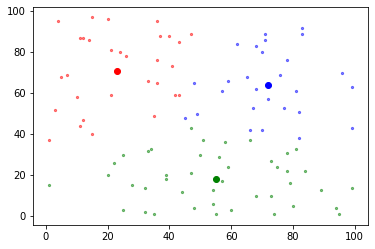

In [4]:
import matplotlib.pyplot as plt
color = ["r", "g", "b"]
for k in range(K):
    plt.scatter(X[np.where(R_nk[:, k]==1)][:,0],
               X[np.where(R_nk[:, k]==1)][:,1],
               c = color[k], s=5, alpha=0.5)
    plt.scatter(C[k,0], C[k,1], c=color[k])
plt.show()

# K-Means with cosine similarity

In [5]:
import numpy as np

K = 3
N = 100
V = 2 # 색인어(Index/Unique/Distinct terms)

np.random.seed(0)
X = np.random.randint(99, size=(N, V)) +1
C = np.random.randint(99, size=(K, V)) +1

In [6]:
for _ in range(10):
    # Expectation
    R_nk = np.zeros((N, K))
    angle = np.zeros((N, K))
    # Ck - X 거리
    innerproduct = X.dot(C.T)
    Cnorm = np.linalg.norm(C, axis=1)
    for k in range(K):
        Xnorm = np.linalg.norm(X, axis=1)
        angle[:,k] = innerproduct[:,k]/(Xnorm*Cnorm[k])
    # 각도 유사도 가장 큰 index, R_nk[idnxex] = 1 
    for k in range(K):
        R_nk[np.where(
            np.argmax(angle, axis=1) == k), k] = 1 

    # Maximaization 
    SSE = 0.0
    for k in range(K):
        C[k] = X[np.where(R_nk[:,k] == 1)].mean(axis=0)
        subX = X[np.where(R_nk[:,k] == 1)]
        innerproduct = subX.dot(C[k].T)
        Xnorm = np.linalg.norm(subX, axis=1)
        Cnorm = np.linalg.norm(C[k])
        SSE += (innerproduct/(Xnorm*Cnorm)).sum()
    print(SSE)

98.58979434236662
98.77086349429828
98.79764883655051
98.84424112091719
98.88660370350914
98.89389377247672
98.89389377247672
98.89389377247672
98.89389377247672
98.89389377247672


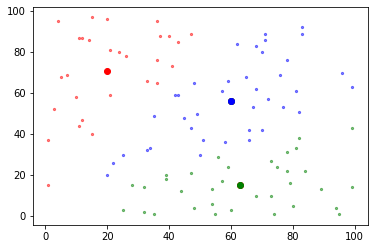

In [7]:
import matplotlib.pyplot as plt
color = ["r", "g", "b"]
for k in range(K):
    plt.scatter(X[np.where(R_nk[:,k] == 1)][:,0],
                X[np.where(R_nk[:,k] == 1)][:,1],
                c=color[k], s=5, alpha=0.5)
    plt.scatter(C[k:,0], C[k:,1], c=color[k])
plt.show()